# 차선인식

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

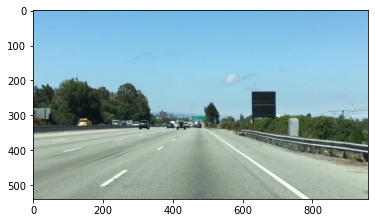

In [5]:
image = cv2.imread('./data/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Color Selection 

Color Picker Tool로 해당 이미지 색상의 RGB 코드값 얻어오기
https://annystudio.com/software/colorpicker/#download

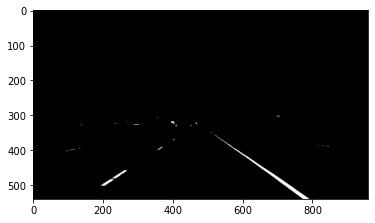

In [6]:
color_select = np.copy(image)

red_threshold = 230
green_threshold = 230
blue_threshold = 230

color_threshold = ((image[:, :, 0] < red_threshold) |
                  (image[:, :, 1] < green_threshold) |
                  (image[:, :, 2] < blue_threshold))

color_select[color_threshold] = [0, 0, 0]

plt.imshow(color_select)

## Region Selection

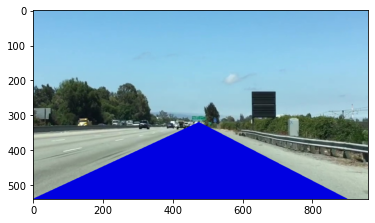

In [7]:
region_select = np.copy(image)

left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 225])
plt.imshow(region_select)

## Color and Region Selection

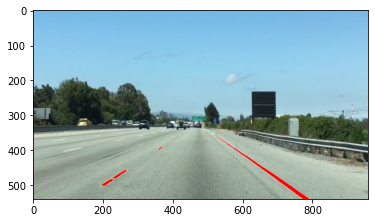

In [9]:
# 1. Color Selection
color_select = np.copy(image)

red_threshold = 230
green_threshold = 230
blue_threshold = 230

color_threshold = ((image[:, :, 0] < red_threshold) |
                  (image[:, :, 1] < green_threshold) |
                  (image[:, :, 2] < blue_threshold))

color_select[color_threshold] = [0, 0, 0]


# 2. Region Selection
region_select = np.copy(image)

# todo
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 255])

region_threshold = ((region_select[:, :, 0] == 0) &  # R channel
                   (region_select[:, :, 1] == 0) &  # G channel
                   (region_select[:, :, 2] == 255))  # B channel


# 3. Color Section + Region Selection
# color_thresholds : 차선(흰색)이 아닌 부분 True 설정
# region_threshold : 관심영역(region of interes, roi)에만 True 설정
lane_select = np.copy(image)
lane_select[~color_threshold & region_threshold] = [255, 0, 0]
    
plt.imshow(lane_select)    

## Canny Edge Detection

## ROI Selection

## Hough Transform

## Pipeline
- Canny Detection -> ROI Selection -> Hough Transform